# Analyse call types, duration, etc for a single cell with az=0
# CTX_20200520_h10_enb131773_cell900_az0_call_types.ipynb

# based on plot_ues_1enb_6cells_join2tbls.ipynb

2020.05.27

In [91]:
import sys #, os
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#-----------------------------------------
# work dir  C:\Users\khafifa\Downloads\data\NDL
#wd= "C:\\Users\\khafifa\\Downloads\\data\\NDL\\XLSX\\"

#wd = "C:\\Users\\khafifa\\Downloads\\data\\plot_ues_1enb_6cells\\"
wd='C:\\Users\\khafifa\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\5G_SE\\plot_ues_1enb_6cells\\'
sys.path.append(wd)

# fn = "CTX_20200507_10_enb131773_TRUECALL_LSR_RAW_V1__ONLY.xlsx"
# fn="CTX_20200521_15_enb131773.xlsx"
fn = "CTX_20200520_h10_enb131773_cell900_az0_call_types.xlsx"
# fn = "CTX_20200521_h15_enb131773_cell910_call_types.xlsx"
d = pd.read_excel(wd+fn, sheet_name='data', encoding='latin1')  


# https://stackoverflow.com/questions/20309456/call-a-function-from-another-file-in-python
from local_ATF_NDL_utils import  *
from local_simutils import  *

def getstats_v2(x, PRINT_RESULTS=False, ROUND_DIGITS=1):
    res = [  round(np.min(x), ROUND_DIGITS), 
             round(np.mean(x), ROUND_DIGITS), 
             round(np.median(x), ROUND_DIGITS), 
             round(np.max(x), ROUND_DIGITS), 
             round(np.std(x), ROUND_DIGITS) ]
    
    if PRINT_RESULTS:
        print('min,\t mean,\t median,\t max,\t std')
        print(res)
    return res

In [92]:
print(d.shape)
print(getstats_v2(x=d['rsrp_dbm']))
d.columns

(1000, 35)
[-125, -110.6, -113.0, -66, 8.0]


Index(['submkt', 'trans_dt', 'hr', 'end_location_lat', 'end_location_lon', 'ta_distance_meters', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number'], dtype='object')

# Identify Emprirical Azimuth

In [93]:
d = compute_dist_and_angle(d)
d.columns

Index(['submkt', 'trans_dt', 'hr', 'end_location_lat', 'end_location_lon', 'ta_distance_meters', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number', 'ue_ant_km_cart', 'ue_ant_km_hav', 'log10_ue_ant_km_hav', 'ue_angle_rad', 'ue_angle_deg', 'center_bin_angle', 'dur_sec'], dtype='object')

In [94]:
getstats_v2(x=d['ue_angle_deg'], PRINT_RESULTS=True )

min,	 mean,	 median,	 max,	 std
[0.1, 164.0, 61.6, 359.9, 152.6]


[0.1, 164.0, 61.6, 359.9, 152.6]

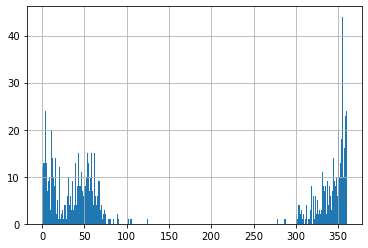

In [97]:
d['ue_angle_deg'].hist(bins=360)

# Validate sanity of data set

In [3]:
# assert len(d['submkt'].unique())==1
# assert len(d['trans_dt'].unique())==1
# assert len(d['hr'].unique())==1
# assert len(d['end_enb'].unique())==1
# assert len(d['end_cell'].unique())==1
# assert len(d['last_8dgs'].unique())==1
# assert len(d['a_cell_id'].unique())==1

# assert len(d['antenna_latitude_degrees_nad83'].unique())==1
# assert len(d['antenna_longitude_degrees_nad83'].unique())==1

# assert len(d['enodeb_sector_id'].unique())==1
# assert len(d['cell_id'].unique())==1
# assert len(d['sector_number'].unique())==1
# assert len(d['carrier_number'].unique())==1

# assert len(d['azimuth_deg'].unique())==1
# assert len(d['max_power_dbm'].unique())==1
# assert len(d['maximumtransmissionpower_1_10_dbm'].unique())==1
# assert len(d['total_power_w'].unique())==1

cols_with_unique_value = []
for col in d.columns:
#     print(col, len(d[col].unique()))
    if len(d[col].unique())==1:
#         print(col)
        cols_with_unique_value.append(col)
        
print("COLUMNS WITH UNIQUE VALUE:")        
print(cols_with_unique_value)
print( len(cols_with_unique_value) )
d_unq = d[cols_with_unique_value]
print(d_unq.shape)
d_unq.head()

COLUMNS WITH UNIQUE VALUE:
['submkt', 'trans_dt', 'hr', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number']
23
(1000, 23)


,submkt,trans_dt,hr,intersite_distance_meters,end_enb,end_cell,last_8dgs,a_cell_id,azimuth_deg,max_power_dbm,maximumtransmissionpower_1_10_dbm,total_power_w,psd_regulatory_power,frequency_band,band_class,antenna_min_frequency_mhz,antenna_height_in,antenna_latitude_degrees_nad83,antenna_longitude_degrees_nad83,enodeb_sector_id,cell_id,sector_number,carrier_number
0,CTX,20200520,10,2343,131773,311480033733900,33733900,12,0,47.7,490,58.884366,164.71 (W/MHz) EIRP,E-UTRA Band 4 - 20MHz - 2100/2300,AWS,1710,98.73,33.093731,-96.758844,131773_12,12,1,2
1,CTX,20200520,10,2343,131773,311480033733900,33733900,12,0,47.7,490,58.884366,164.71 (W/MHz) EIRP,E-UTRA Band 4 - 20MHz - 2100/2300,AWS,1710,98.73,33.093731,-96.758844,131773_12,12,1,2
2,CTX,20200520,10,2343,131773,311480033733900,33733900,12,0,47.7,490,58.884366,164.71 (W/MHz) EIRP,E-UTRA Band 4 - 20MHz - 2100/2300,AWS,1710,98.73,33.093731,-96.758844,131773_12,12,1,2
3,CTX,20200520,10,2343,131773,311480033733900,33733900,12,0,47.7,490,58.884366,164.71 (W/MHz) EIRP,E-UTRA Band 4 - 20MHz - 2100/2300,AWS,1710,98.73,33.093731,-96.758844,131773_12,12,1,2
4,CTX,20200520,10,2343,131773,311480033733900,33733900,12,0,47.7,490,58.884366,164.71 (W/MHz) EIRP,E-UTRA Band 4 - 20MHz - 2100/2300,AWS,1710,98.73,33.093731,-96.758844,131773_12,12,1,2


In [4]:
d_var = d.drop(cols_with_unique_value, axis=1)
print(d_var.shape)
print(d_var.columns)
d_var.head()

(1000, 12)
Index(['end_location_lat', 'end_location_lon', 'ta_distance_meters', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db'], dtype='object')


,end_location_lat,end_location_lon,ta_distance_meters,mobile_number,service_type,start_type,end_type,start_time,duration,rsrp_dbm,rlc_dl_throughput_kbps,mean_ul_sinr_db
0,33.099894,-96.751772,1014,14693520939,Data Only,New Connection,Connection Release,2020-05-20 10:58:56,00:10.467,-106,843.555556,12.593000
1,33.097149,-96.739160,1248,12149983656,Data Only,New Connection,Outgoing X2 Handover,2020-05-20 10:58:55,00:07.185,-113,4878.708075,13.450000
2,33.099304,-96.749760,1014,14696360678,Data Only,New Connection,Connection Release,2020-05-20 10:59:39,00:10.034,-110,NaN,13.953000
3,33.101936,-96.748628,1248,14694010800,Data Only,Intra-eNB Handover,Outgoing X2 Handover,2020-05-20 09:59:55,00:22.191,-98,11625.226098,20.136000
4,33.102321,-96.752006,1326,14694010800,Data Only,X2 Handover,Outgoing X2 Handover,2020-05-20 10:00:24,00:03.050,-101,9011.958763,19.561001


In [5]:
print('\n*** service_type:\n',d['service_type'].value_counts())
print('\n*** start_type:\n',d['start_type'].value_counts())
print('\n*** end_type:\n',d['end_type'].value_counts())



*** service_type:
 Data Only         965
Voice and Data     35
Name: service_type, dtype: int64

*** start_type:
 New Connection        884
X2 Handover            88
Intra-eNB Handover     28
Name: start_type, dtype: int64

*** end_type:
 Connection Release            728
Outgoing X2 Handover          204
Intra-eNB Handover             67
Connection Reestablishment      1
Name: end_type, dtype: int64


In [6]:
d = compute_dist_and_angle(d)
d.columns

Index(['submkt', 'trans_dt', 'hr', 'end_location_lat', 'end_location_lon', 'ta_distance_meters', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number', 'ue_ant_km_cart', 'ue_ant_km_hav', 'log10_ue_ant_km_hav', 'ue_angle_rad', 'ue_angle_deg', 'center_bin_angle', 'dur_sec'], dtype='object')

# Check distributions of Some KPIs

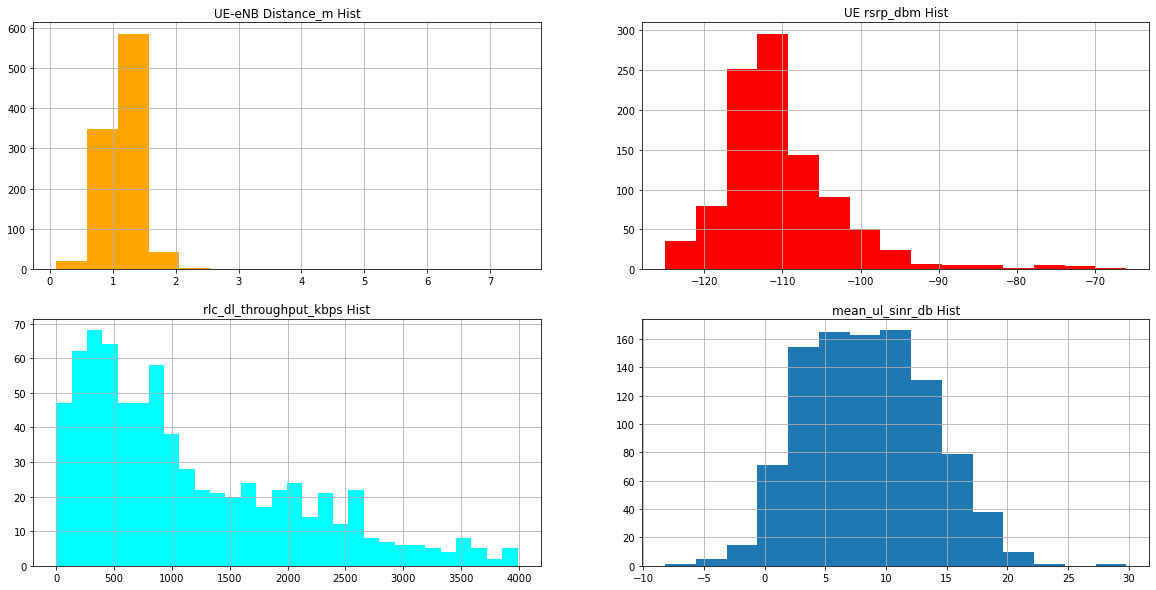

In [7]:
# d['ta_distance_meters'].hist(bins=30)
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_size_inches(20,10)

plt.subplot(2,2,1)  # if use subplot
# ax1=d['ta_distance_meters'].hist(bins=15, color='orange')
ax1=d['ue_ant_km_hav'].hist(bins=15, color='orange')
plt.title('UE-eNB Distance_m Hist')

plt.subplot(2,2,2)  # if use subplot
ax2=d['rsrp_dbm'].hist(bins=15, color='red')
plt.title('UE rsrp_dbm Hist')

plt.subplot(2,2,3)  # if use subplot
# ax2=d['rlc_dl_throughput_kbps'].hist(bins=30)
ax2=d[d['rlc_dl_throughput_kbps']<4000]['rlc_dl_throughput_kbps'].hist(bins=30, color='cyan')
plt.title('rlc_dl_throughput_kbps Hist')

plt.subplot(2,2,4)  # if use subplot
ax2=d['mean_ul_sinr_db'].hist(bins=15)
plt.title('mean_ul_sinr_db Hist')

plt.savefig(wd+'foo_distributions.png', bbox_inches='tight' )

# fig.subplots_adjust(wspace=2)
# plt.show()


# REMOVE DISTANCE BASED OUTLIERS

In [8]:
# REMOVE DISTANCE BASED OUTLIERS
print('d.shape = ', d.shape)
max_iterations=50 ; print('max_iterations=',max_iterations)

while max_iterations > 0:      #d.shape[0] < checking_point:
    checking_point = d.shape[0]
#     d =  remove_outliers(d, COLNAME='ta_distance_meters')
    d =  remove_outliers(d, COLNAME='ue_ant_km_hav')
    max_iterations = max_iterations-1
    if checking_point == d.shape[0]:
        break
        
print('max_iterations now=',max_iterations)        
print('d.shape now = ', d.shape)


d.shape =  (1000, 42)
max_iterations= 50
max_iterations now= 45
d.shape now =  (978, 42)


In [9]:
# getstats_v2(d['rlc_dl_throughput_kbps'])
getstats_v2(d[d['rlc_dl_throughput_kbps']<5000]['rlc_dl_throughput_kbps'])

[1.93939393939394,
 1227.6504690151714,
 886.666666666667,
 4825.20553780618,
 1037.4325027572395]

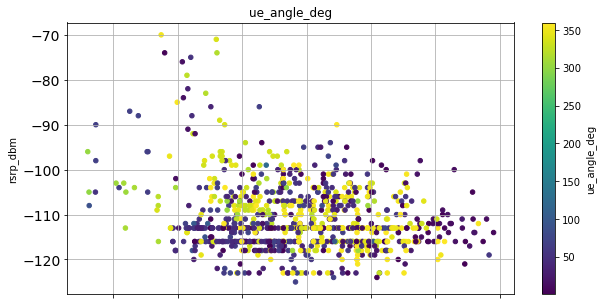

In [10]:
# d.plot.scatter(x='ta_distance_meters', y='ue_ant_km_hav',grid=True)
COLOR_COL = 'ue_angle_deg'
d.plot.scatter(x='ue_ant_km_hav', y='rsrp_dbm', c=COLOR_COL, colormap='viridis',figsize=(10,5),
               title=COLOR_COL, grid=True, fontsize=14)
# d['ta_distance_meters'].hist(bins=15)
# print('max_iterations=',max_iterations)
# print(d.shape)


# MORE BASIC GRAPHS

In [11]:
wd

'C:\\Users\\khafifa\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\5G_SE\\plot_ues_1enb_6cells\\'

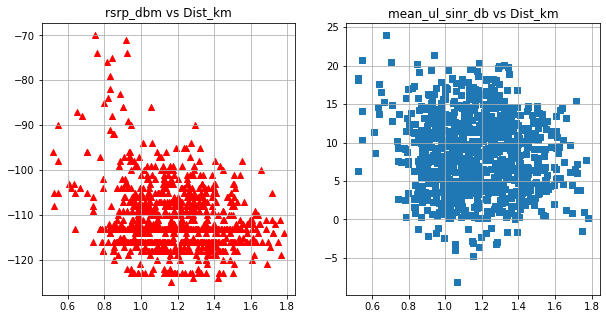

In [12]:
# https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib
# https://stackoverflow.com/questions/47684652/how-to-customize-marker-colors-and-shapes-in-scatter-plot
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(10,5)

plt.subplot(1, 2, 1)
plt.scatter(d['ue_ant_km_hav'], d['rsrp_dbm'], c='red', marker ='^')
plt.grid()
plt.title('rsrp_dbm vs Dist_km')

plt.subplot(1, 2, 2)
plt.scatter(d['ue_ant_km_hav'], d['mean_ul_sinr_db'], marker=',')
plt.grid()
plt.title('mean_ul_sinr_db vs Dist_km')

# plt.show()
plt.savefig(wd+'foo_rsrp_sinr_vs_dist.png', bbox_inches='tight' )


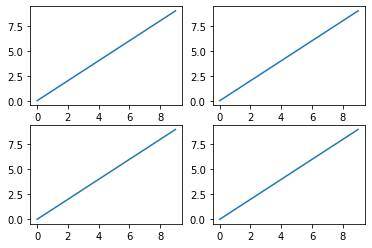

In [13]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, ax = plt.subplots(nrows=2, ncols=2)

for row in ax:
    for col in row:
        col.plot(x, y)

plt.show()

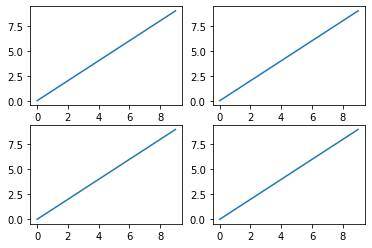

In [14]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.plot(x, y)

plt.show()

In [15]:
# # Add eNB coordinated to the df
# if len(d['end_enb'].unique())==1 and d['end_enb'].unique()[0]==131773:
#     # specify coordinates of serving eNB (from atoll DB)
#     enb_lat_long = [33.09373, -96.75884]
#     d['antenna_latitude_degrees_nad83']=enb_lat_long[0]
#     d['antenna_longitude_degrees_nad83']=enb_lat_long[1]
    
d['antenna_latitude_degrees_nad83']=round(d['antenna_latitude_degrees_nad83'],5)
d['antenna_longitude_degrees_nad83']=round(d['antenna_longitude_degrees_nad83'],5)

(978, 42)

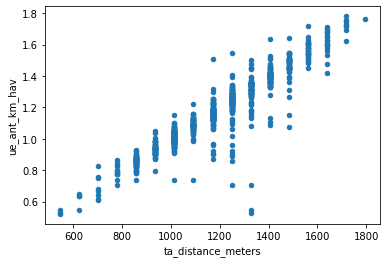

In [16]:

d.plot.scatter(x='ta_distance_meters', y='ue_ant_km_hav')
d.shape

In [17]:
sum(d['ta_distance_meters'].notna())

978

In [18]:
d['end_cell'].value_counts()

311480033733900    978
Name: end_cell, dtype: int64

In [19]:
print(d.shape)

d['cell_number'] = ['x'+str(x) for x  in np.array(d['end_cell']-311480033733000)]
# type(d['cell_number'])
d['cell_number'].value_counts()


(978, 42)


x900    978
Name: cell_number, dtype: int64

In [20]:
# drop rows with cells x926 and x916
ix = np.logical_and( d['cell_number']!='x926'  ,  d['cell_number']!='x916'  )
sum(ix)

978

In [21]:
d = d[ix]
d.reset_index(drop=True, inplace=True)
d.shape

(978, 43)

In [22]:
d['end_cell'].value_counts()

311480033733900    978
Name: end_cell, dtype: int64

# Set  ICONs and COLORs for UEs per cell

In [23]:
# ICON COLORS
#  ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
#   'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 
#   'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
    
ICONS_LIST   = [ 'leaf',    'mobile', 'android',  'anchor', 'angle-up',  'adjust' ]    
ICONS_COLORS = [ 'green',   'blue',   'gray',     'red',    'pink',      'orange' ]        

def assign_icons(d, 
                 icons       = ICONS_LIST,
                 icon_colors = ICONS_COLORS):
    
    cells = d['end_cell'].unique()
#     assert     len(cells) == 6
    
    num_icons = len(cells)
    d['icon']       = icons[0]
    d['icon_color'] = icon_colors[0]
    
    for i in range(1,num_icons):
        ix =      d['end_cell'] == cells[i]
        d.loc[ix, ['icon']]       = icons[i]
        d.loc[ix, ['icon_color']] = icon_colors[i]
    
    return d
#%%
d = assign_icons(d, 
                 icons = ICONS_LIST, 
                 icon_colors = ICONS_COLORS)

# Get stats & legend on UEs per cell

In [24]:
pd.DataFrame(  { 'cell_number':  d['cell_number'].value_counts().index,
                 'color':d['icon_color'].value_counts().index   ,   
                 'icon':d['icon'].value_counts().index,  
                 'counts':np.array(d['icon'].value_counts())} )

,cell_number,color,icon,counts
0,x900,green,leaf,978


In [25]:
ix = d['cell_number']=='x906'
d['rsrp_dbm'][ix].value_counts()

Series([], Name: rsrp_dbm, dtype: int64)

# Split RSRP range into n colors

In [26]:
all_colors=['black', 'red', 'green']
print('len(all_colors)',len(all_colors))
rsrp_splits = len(all_colors)+1
rsrps = d['rsrp_dbm']
rsrp_intervals = np.linspace( min(rsrps), 
                                  max(rsrps), 
                                  rsrp_splits )  
print(rsrp_intervals)
print(len(all_colors))
for i in range(len(all_colors)):
    ss=str(i)+'_['+str(round(rsrp_intervals[i],1))+','+str(round(rsrp_intervals[i+1],1))+')'
    if i==len(all_colors)-1:
        ss=str(i)+'_['+str(round(rsrp_intervals[i],1))+','+str(round(rsrp_intervals[i+1],1))+']'
    print(i, ss)
    

len(all_colors) 3
[-125.         -106.66666667  -88.33333333  -70.        ]
3
0 0_[-125.0,-106.7)
1 1_[-106.7,-88.3)
2 2_[-88.3,-70.0]


In [27]:
#%%
# split RSRP range into n colors
# define new columns: rsrp_color, rsrp_range
# d['rsrp_color'] will have color for each UE according to its RSRP value
# d['rsrp_range'] will have group number + RSRP range corresponding to each UE + number of UEs that range
#     ICON COLORS
#      ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
#       'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 
#       'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
def set_rsrp_color_v2(d, all_colors=['black', 'red', 'green']):
    
    rsrp_splits = len(all_colors)+1
    d['rsrp_color']=all_colors[-1:][0]
    d['rsrp_color']='none'
    d['rsrp_range']='[0,0]'
    
    rsrps = d['rsrp_dbm']
    rsrp_intervals = np.linspace( min(rsrps), 
                                  max(rsrps), 
                                  rsrp_splits )  
    
    for i in range(len(all_colors)):
        ix1 = d['rsrp_dbm']>=rsrp_intervals[i]
        
        ix2 = d['rsrp_dbm']<rsrp_intervals[i+1]
        if (i==len(all_colors)-1):
            ix2 = d['rsrp_dbm']<=rsrp_intervals[i+1]
            
        condition = np.logical_and(ix1,ix2)
        
        d.loc[condition, ['rsrp_color']] = all_colors[i]
        
        group_number = len(all_colors)-i
        ss = str(group_number) + '_['+str(round(rsrp_intervals[i],1))+','+str(round(rsrp_intervals[i+1],1))
        ss=ss+')'
        if i==len(all_colors)-1:
            ss=ss+']'
            
        num_in_range = sum(condition)
        
        d.loc[condition, ['rsrp_range']] = ss+"_n="+str(num_in_range)
        
        #print('rsrp colors:\n',d['rsrp_color'].value_counts())
    return d, rsrp_intervals


In [28]:
# split RSRP range into n colors
# define a new column rsrp_color
#     ICON COLORS
#      ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
#       'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 
#       'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
rsrp_colors = ['darkblue', 'darkgreen', 'orange', 'pink']        
# d, rsrp_intervals = set_rsrp_color(d, all_colors=rsrp_colors)
d, rsrp_intervals = set_rsrp_color_v2(d, all_colors=rsrp_colors)
print(rsrp_intervals)
print('rsrp colors:\n',d['rsrp_color'].value_counts())
print('rsrp ranges:\n',d['rsrp_range'].value_counts())


[-125.   -111.25  -97.5   -83.75  -70.  ]
rsrp colors:
 darkblue     596
darkgreen    337
orange        36
pink           9
Name: rsrp_color, dtype: int64
rsrp ranges:
 4_[-125.0,-111.2)_n=596    596
3_[-111.2,-97.5)_n=337     337
2_[-97.5,-83.8)_n=36        36
1_[-83.8,-70.0)]_n=9         9
Name: rsrp_range, dtype: int64


In [29]:
# COLOR_COL = 'rsrp_color'
# d.plot.scatter(x='ue_ant_km_hav', y='rsrp_dbm', c=COLOR_COL, #colormap='viridis',
#                figsize=(10,5),
#                title=COLOR_COL, grid=True, fontsize=14)

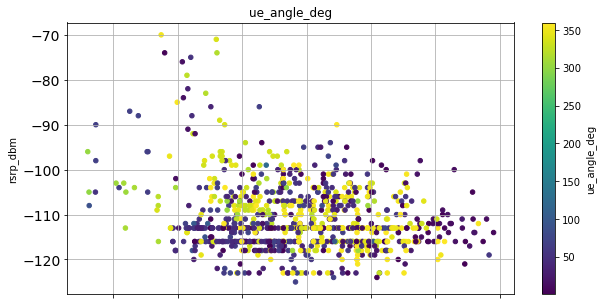

In [30]:
COLOR_COL = 'ue_angle_deg'
d.plot.scatter(x='ue_ant_km_hav', y='rsrp_dbm', c=COLOR_COL, colormap='viridis',figsize=(10,5),
               title=COLOR_COL, grid=True, fontsize=14)

# Start making real plots

In [31]:
print(getstats_v2(x=d['rsrp_dbm']))

[-125, -110.9918200408998, -113.0, -70, 7.327563348208696]


In [32]:
print(getstats_v2(x=d['log10_ue_ant_km_hav']))

[-0.2834958362267831, 0.060117891445056054, 0.06475739942967948, 0.2506639194632435, 0.08676357634176379]


In [33]:
print(getstats_v2(x=d['ue_ant_km_hav']))

[0.5206, 1.1708493865030705, 1.1608, 1.781, 0.22492762531646257]


In [34]:
# d['dist'] = np.array(d['ue_ant_km_hav'])

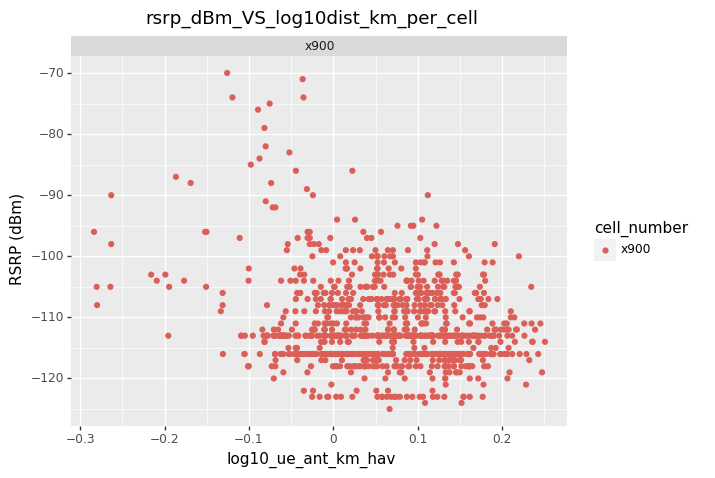

<ggplot: (-9223371923285614157)>

In [35]:
TITLE = 'rsrp_dBm_VS_log10dist_km_per_cell'
plots=(ggplot(d)     + 
       aes(x='log10_ue_ant_km_hav', y='rsrp_dbm', color='cell_number')     + 
       geom_point()  #+ geom_smooth()
 + facet_wrap("cell_number", nrow=2)
 + labs( title=TITLE , 
        x='log10_ue_ant_km_hav', 
        y='RSRP (dBm)')  )
      
plots

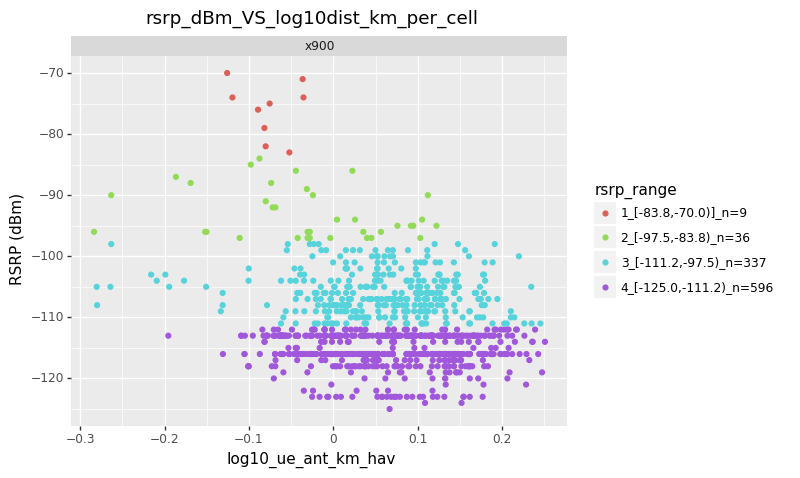

<ggplot: (113569152253)>

In [36]:
TITLE = 'rsrp_dBm_VS_log10dist_km_per_cell'
plots=(ggplot(d)     + 
       aes(x='log10_ue_ant_km_hav', y='rsrp_dbm', color='rsrp_range')     + 
       geom_point()  #+ geom_smooth()
 + facet_wrap("cell_number", nrow=2)
 + labs( title=TITLE , 
        x='log10_ue_ant_km_hav', 
        y='RSRP (dBm)')  )
      
plots

In [37]:
savefn = wd+TITLE + ".png"
plots.save(filename = savefn, height=5, width=5, units = 'in', dpi=1000)

C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:\Users\khafifa\AppData\Local\Continuum\anaconda3\Scripts\5G_SE\plot_ues_1enb_6cells\rsrp_dBm_VS_log10dist_km_per_cell.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


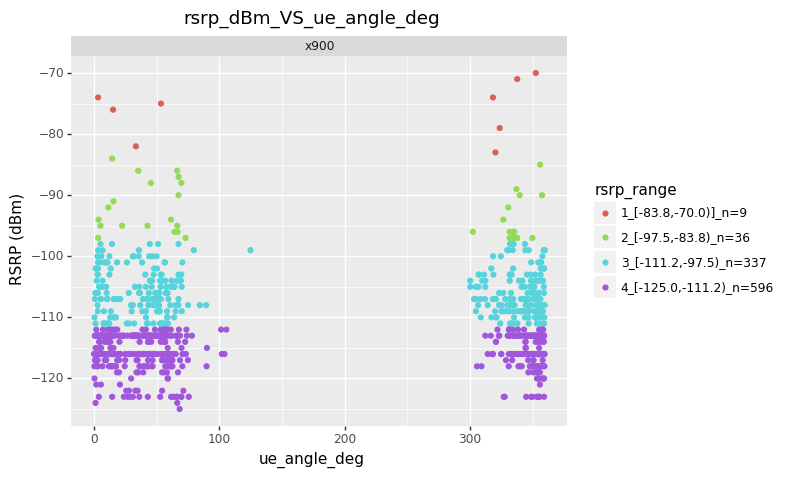

<ggplot: (113569297300)>

In [38]:
TITLE = 'rsrp_dBm_VS_ue_angle_deg'
plots=(ggplot(d)     + 
       aes(x='ue_angle_deg', y='rsrp_dbm', color='rsrp_range')     + 
       geom_point()  #+ geom_smooth()
 + facet_wrap("cell_number", nrow=2)
 + labs( title=TITLE , 
        x='ue_angle_deg', 
        y='RSRP (dBm)')  )
      
plots

In [39]:
savefn = wd+TITLE + ".png"
plots.save(filename = savefn, height=5, width=5, units = 'in', dpi=1000)

C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:\Users\khafifa\AppData\Local\Continuum\anaconda3\Scripts\5G_SE\plot_ues_1enb_6cells\rsrp_dBm_VS_ue_angle_deg.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [40]:
d.columns

Index(['submkt', 'trans_dt', 'hr', 'end_location_lat', 'end_location_lon', 'ta_distance_meters', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number', 'ue_ant_km_cart', 'ue_ant_km_hav', 'log10_ue_ant_km_hav', 'ue_angle_rad', 'ue_angle_deg', 'center_bin_angle', 'dur_sec', 'cell_number', 'icon', 'icon_color', 'rsrp_color', 'rsrp_range'], dtype='object')

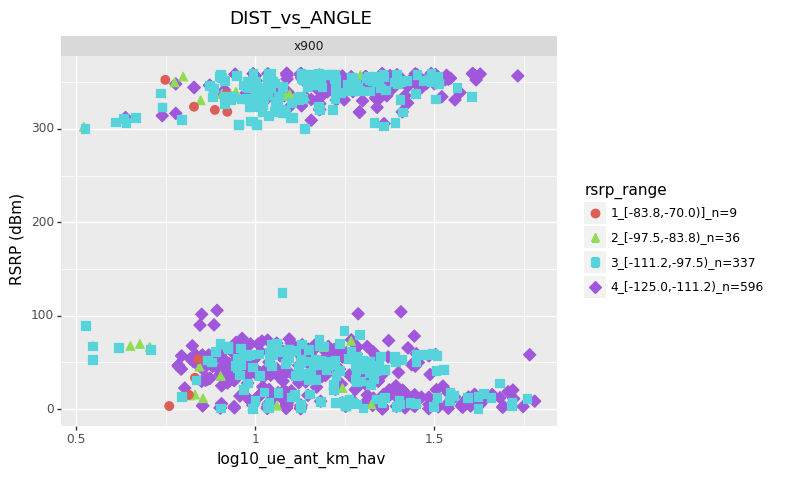

<ggplot: (-9223371923285592558)>

In [41]:
TITLE = 'DIST_vs_ANGLE'
plots=(ggplot(d)     + 
       aes(x='ue_ant_km_hav', y='ue_angle_deg', color='rsrp_range', shape='rsrp_range')     + 
       geom_point(size=3)  #+ geom_smooth()
 + facet_wrap("cell_number", nrow=2)
 + labs( title=TITLE , 
        x='log10_ue_ant_km_hav', 
        y='RSRP (dBm)')  )
      
plots

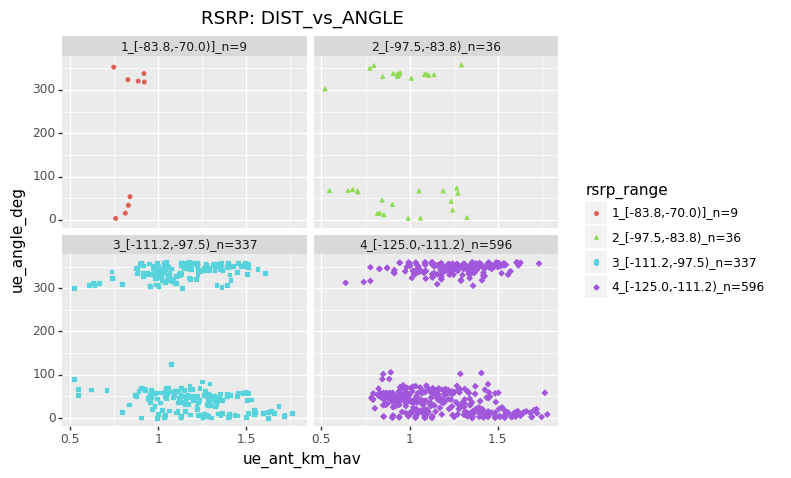

<ggplot: (113569611489)>

In [42]:
# https://ggplot2.tidyverse.org/reference/facet_grid.html
# facet_grid(rows = vars(drv))
TITLE = 'RSRP: DIST_vs_ANGLE'
plots=(ggplot(d)     + 
       aes(x='ue_ant_km_hav', y='ue_angle_deg', color='rsrp_range', shape='rsrp_range')     + 
       geom_point(size=1) 
 + facet_wrap("rsrp_range", nrow=2)
 + labs( title=TITLE , 
        x='ue_ant_km_hav', 
        y='ue_angle_deg')  )
      
plots


# savefn = wd+TITLE + ".png"
# plots.save(filename = savefn, height=5, width=5, units = 'in', dpi=1000)

In [128]:
save_image_fn = wd+TITLE+'.png'
save_image_fn = wd+'foo.png'
save_image_fn

'C:\\Users\\khafifa\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\5G_SE\\plot_ues_1enb_6cells\\foo.png'

In [129]:
plots.save(filename = save_image_fn, height=5, width=5, units = 'in', dpi=1000)

C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:\Users\khafifa\AppData\Local\Continuum\anaconda3\Scripts\5G_SE\plot_ues_1enb_6cells\foo.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


# Plot rlc_dl_throughput_kbps vs RSRP

(978, 47)

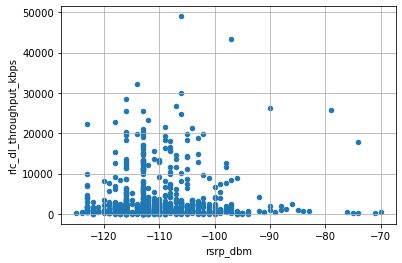

In [43]:
d.plot.scatter(x='rsrp_dbm', y='rlc_dl_throughput_kbps',grid=True)
d.shape  

In [44]:
#%%   REMOVE rows with NaN in tput column
d2 = d[d['rlc_dl_throughput_kbps'].notna()]        
d2.shape
#%% PLOT 'rsrp_dbm'  vs 'rlc_dl_throughput_kbps'
# print(getstats(d2['rlc_dl_throughput_kbps']))
# d2.plot.scatter(x='rlc_dl_throughput_kbps', y='rsrp_dbm')

(872, 47)

(709, 47)
max_iterations= 37
[1.93939393939394, 3753.35265700483]


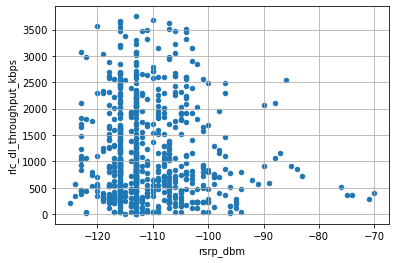

In [45]:
#%%
# REMOVE rlc_dl_throughput_kbps  OUTLIERS
d=d2
max_iterations=50
while max_iterations > 0:      #d.shape[0] < checking_point:
    checking_point = d.shape[0]
    d =  remove_outliers(d, COLNAME='rlc_dl_throughput_kbps')
    max_iterations = max_iterations-1
    if checking_point == d.shape[0]:
        break
print(d.shape)    
print('max_iterations=',max_iterations)
#%%
#%% PLOT 'rsrp_dbm'  vs 'rlc_dl_throughput_kbps'
print(getstats(d['rlc_dl_throughput_kbps']))
d.plot.scatter(y='rlc_dl_throughput_kbps', x='rsrp_dbm', grid=True)


C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


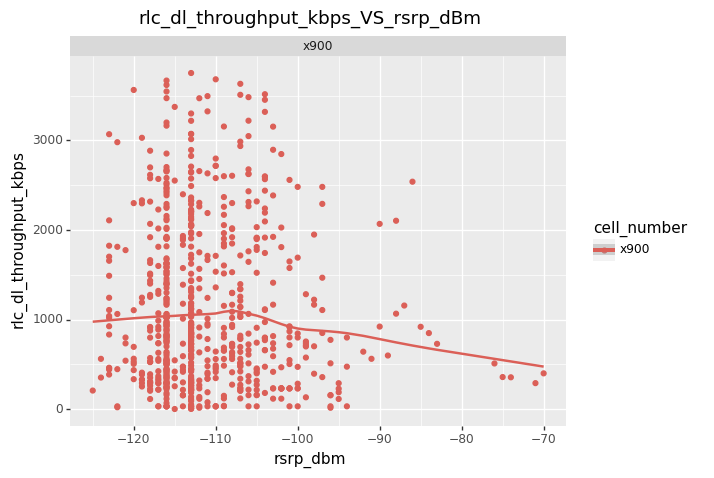

<ggplot: (113569279636)>

In [46]:
TITLE = 'rlc_dl_throughput_kbps_VS_rsrp_dBm'
plots=(ggplot(d)     + 
       aes(x='rsrp_dbm', y='rlc_dl_throughput_kbps', color='cell_number')     + 
       geom_point()  + geom_smooth()
 + facet_wrap("cell_number", nrow=2)
 + labs( title=TITLE , 
        x='rsrp_dbm', 
        y='rlc_dl_throughput_kbps')  )
      
plots

C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


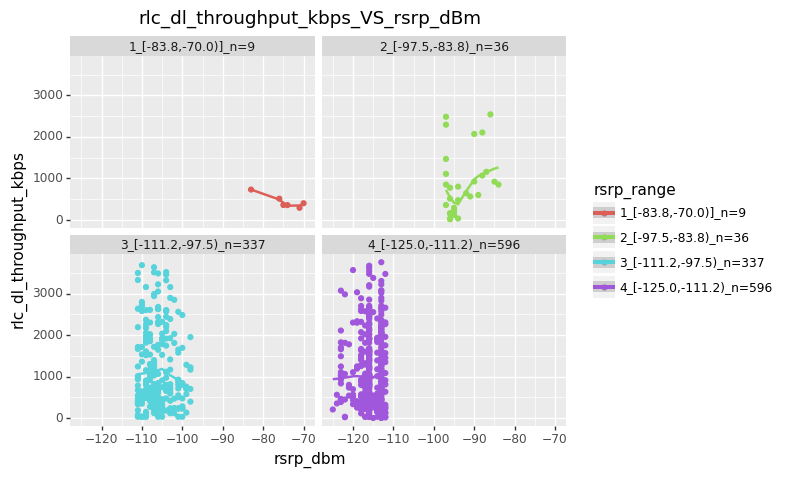

<ggplot: (-9223371923285418061)>

In [50]:
TITLE = 'rlc_dl_throughput_kbps_VS_rsrp_dBm'
plots=(ggplot(d)     + 
       aes(x='rsrp_dbm', y='rlc_dl_throughput_kbps', color='rsrp_range')     + 
       geom_point()  + geom_smooth()
 + facet_wrap("rsrp_range", nrow=2)
 + labs( title=TITLE , 
        x='rsrp_dbm', 
        y='rlc_dl_throughput_kbps')  )
      
plots

In [51]:
save_image_fn = wd+TITLE+'.png'
save_image_fn

'C:\\Users\\khafifa\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\5G_SE\\plot_ues_1enb_6cells\\rlc_dl_throughput_kbps_VS_rsrp_dBm.png'

In [52]:
plots.save(filename = wd+TITLE+'.png', height=5, width=5, units = 'in', dpi=1000)

C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:\Users\khafifa\AppData\Local\Continuum\anaconda3\Scripts\5G_SE\plot_ues_1enb_6cells\rlc_dl_throughput_kbps_VS_rsrp_dBm.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\khafifa\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


In [72]:
d['rsrp_range'].value_counts().index

Index(['4_[-125.0,-111.2)_n=596', '3_[-111.2,-97.5)_n=337', '2_[-97.5,-83.8)_n=36', '1_[-83.8,-70.0)]_n=9'], dtype='object')

In [77]:
d.columns

Index(['submkt', 'trans_dt', 'hr', 'end_location_lat', 'end_location_lon', 'ta_distance_meters', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number', 'ue_ant_km_cart', 'ue_ant_km_hav', 'log10_ue_ant_km_hav', 'ue_angle_rad', 'ue_angle_deg', 'center_bin_angle', 'dur_sec', 'cell_number', 'icon', 'icon_color', 'rsrp_color', 'rsrp_range'], dtype='object')

# Plot UEs and eNB on GoogleMap

In [53]:
import plotnine
from plotnine import *

In [80]:
#%%
# DO PLOTTING 
def create_map_UEs_Only(d, 
               mwd='C:\\Users\\khafifa\\Downloads\\data\\pyviz\\', 
               mapfn='C:\\Users\\khafifa\\Downloads\\data\\pyviz\\farid_map2.html',
               COLOR_CODE_FOR_RSRP=True):
    
    import folium
    import numpy as np
    import pandas as pd
    
    lats = np.array(d['end_location_lon'])
    longs = np.array(d['end_location_lat'])
    
    UElocs = pd.DataFrame(  {'x':longs, 'y':lats}  )
    
#     np.mean(lats)  # -96.75452908256881
#     np.mean(longs) #  33.09637639347604
#     Center = [ np.mean(longs), np.mean(lats)  ]
#     Center = [ np.median(longs), np.median(lats)  ]
    Center = [ d['antenna_latitude_degrees_nad83'].unique()[0],    
               d['antenna_longitude_degrees_nad83'].unique()[0] ]
#    eNB_coords,  # [ 33.09373, -96.75884]
#    eNB_coords = np.array(df_coordinates.iloc[0])
#    UElocs = df_coordinates.iloc[1:]
    Radius = 2000
    Radius = 1000*np.max(d['ue_ant_km_hav'])
    '''
    mwd = 'C:\\Users\\Farid Khafizov\\conda\\pyviz\\'
    mwd = 'C:\\Users\\khafifa\\Downloads\\data\\pyviz\\'
    os.chdir(wd)
    x0 =  42.375140
    y0 = -71.0589
    longs = [x0, x0+0.01, x0-0.01,  x0+.013]
    lats = [y0, y0+0.02, y0+0.015, y0-.003]
    tooltip = 'Click For More Info'
    UEIcon = folium.features.CustomIcon(wd+'icons/mobile-alt-solid.svg', 
                                               icon_size=(50, 50))
    TIcon = folium.features.CustomIcon(wd+'icons/logo.png', 
                                               icon_size=(50, 50))
    '''
    
    # Create map object
    m = folium.Map(  location=Center,  # [ 33.09373, -96.75884]
                     zoom_start=14)

    # Create custom marker icons
    CellTowerIcon = folium.features.CustomIcon(mwd+'icons/cell_tower.png', 
                                               icon_size=(30, 30))
    
    
    folium.Marker(location=Center,
                  popup='<strong>Center Location</strong>',
                  tooltip=str(Center),
                  icon=CellTowerIcon).add_to(m)
    
    # ICON COLORS
    #  ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
    #   'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 
    #   'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
    for k in range(UElocs.shape[0]):
        # print(k)      
        
        # color each UE either per RSRP group or default
        if COLOR_CODE_FOR_RSRP:
            icon_color = d['rsrp_color'][k]
        else:
            icon_color = d['icon_color'][k]
            
        icon_tag   = d['icon'][k]
        
        prompt = 'UE_'+str(k)+' '+str(np.array(UElocs.iloc[k])) + ' ' + str(d['rsrp_dbm'][k])
        
        folium.Marker( location = np.array(UElocs.iloc[k]), 
                       tooltip = prompt,
                  icon=folium.Icon(color=icon_color, 
#                                   icon = 'mobile' ,prefix='fa',
                                   icon = icon_tag ,
                                   prefix='fa'
                                  )).add_to(m)
    
    
    # set eNB Circle marker
    folium.CircleMarker(
        location = Center,
        radius = 40,
        popup= str(Center),
        color='#428bca',
        fill=True,
        fill_color='#428bca'
    ).add_to(m)
    
    # set radious circle
    folium.Circle(
        location = Center,
        radius = Radius,
        popup= str(Center),
        color='red',
        fill=True,
        fill_color='#428bca'
    ).add_to(m)

    # rsrp_colors    = [     'darkblue',    'darkgreen',  'orange',   'pink']   
    # rsrp_intervals = [-123.          -111.           -99.       -87.    -75.]
    
#    legend_html = '" <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 180px; \
#         border:2px solid grey; z-index:9999; font-size:14px;">&nbsp; RSRP_dBm values:<br>\
#         &nbsp; LEAF &nbsp;   <i class="fa fa-map-marker fa-2x"   style="color:green"></i><br>\
#         &nbsp; CLOUD &nbsp;  <i class="fa fa-map-marker fa-2x"   style="color:red"></i>       </div> "'
    
#     legend_html = '" <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 150px; \
#          border:2px solid grey; z-index:9999; font-size:14px;">&nbsp; RSRP_dBm values:<br>\
#          &nbsp;    <i class="fa fa-map-marker fa-2x"   style="color:pink"></i>      &nbsp; [-87, -75)  <br> \
#          &nbsp;    <i class="fa fa-map-marker fa-2x"   style="color:orange"></i>    &nbsp; [-99, -87)  <br> \
#          &nbsp;    <i class="fa fa-map-marker fa-2x"   style="color:darkgreen"></i> &nbsp; [-111, -99) <br> \
#          &nbsp;    <i class="fa fa-map-marker fa-2x"   style="color:darkblue"></i>  &nbsp; [-123, -111)<br> \
#      </div> "'
    
    rsrps = d['rsrp_range'].value_counts().index
    
    legend_html = "\" <div style=\"position: fixed; bottom: 50px; left: 50px; width: 200px; height: 150px;" +\
    "border:2px solid grey; z-index:9999; font-size:14px;\">&nbsp; RSRP_dBm values:<br>" +\
    "&nbsp;    <i class=\"fa fa-map-marker fa-2x\"   style=\"color:pink\"></i>      &nbsp;" + rsrps[3] +  "<br>" +\
    "&nbsp;    <i class=\"fa fa-map-marker fa-2x\"   style=\"color:orange\"></i>    &nbsp;" + rsrps[2] +  "<br>" +\
    "&nbsp;    <i class=\"fa fa-map-marker fa-2x\"   style=\"color:darkgreen\"></i> &nbsp;" + rsrps[1] +  "<br>" +\
    "&nbsp;    <i class=\"fa fa-map-marker fa-2x\"   style=\"color:darkblue\"></i>  &nbsp;" + rsrps[0] +  "<br>  </div> \""
    
    
    
    
    m.get_root().html.add_child(folium.Element(legend_html))
#    
##    https://stackoverflow.com/questions/53941597/how-to-insert-text-as-icon-on-map/54173673
#    div = folium.DivIcon(html=(
#    '<svg height="100" width="100">'
#    '<circle cx="50" cy="50" r="40" stroke="yellow" stroke-width="3" fill="none" />'
#    '<text x="30" y="50" fill="black">9000</text>'
#    '</svg>'))
#    
#    folium.Marker(Center, icon=div).add_to(m)
#    
    
    
#    folium.Marker(
#    location=[44.639, -124.5339],
#    popup=folium.Popup(max_width=450).add_child(\
#        folium.Vega(vis2, width=450, height=250))).add_to(m)

#    mapfn.split('\\')[-1].split('.')[0]

#    title_html = '" <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 150px; \
#         border:2px solid grey; z-index:9999; font-size:14px;">&nbsp; TITLE </div>"'
#    m.get_root().html.add_child(folium.Element(title_html))

    
    #help(folium.Icon)    
    # Generate map
    m.save(mapfn)
    
    return m


In [82]:
#%%
# CREATE TITLE AND MAP NAME
assert     len(d['submkt'].unique()) == 1
assert     len(d['trans_dt'].unique()) == 1
assert     len(d['hr'].unique()) == 1
assert     len(d['end_enb'].unique()) == 1
#assert     len(d['start_cell'].unique()) == 1

TITLE = d['submkt'].unique()[0]+\
        '_' + str(d['trans_dt'].unique()[0])+\
        '_' + str(d['hr'].unique()[0])+\
        '_bs' + str(d['end_enb'].unique()[0])#+\
#        '_cl' + str(d['start_cell'].unique()[0])

mapname = d['submkt'].unique()[0]+str(d['trans_dt'].unique()[0])+TITLE+'.html'

#%
m = create_map_UEs_Only(d, 
               mwd='C:\\Users\\khafifa\\Downloads\\data\\pyviz\\', 
               mapfn=wd+TITLE+'.html',
               COLOR_CODE_FOR_RSRP=True )

#                num=d.shape[0], 
#assert res ==1               
#%%


In [56]:
wd+TITLE+'.html'

'C:\\Users\\khafifa\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\5G_SE\\plot_ues_1enb_6cells\\CTX_20200520_10_bs131773.html'

In [84]:
# CHECK FOR DUPLICATE

print(d.shape)
d2= d.drop_duplicates()
print(d.shape)

(709, 47)
(709, 47)


# CHECK EMPIRICAL ESTIMATE OF AZIMUTH

In [86]:
getstats_v2(d['ue_angle_deg'])

[0.1, 158.62425952045132, 58.5, 359.9, 153.46411994682182]

In [59]:
d.columns

Index(['submkt', 'trans_dt', 'hr', 'end_location_lat', 'end_location_lon', 'ta_distance_meters', 'intersite_distance_meters', 'end_enb', 'end_cell', 'last_8dgs', 'a_cell_id', 'mobile_number', 'service_type', 'start_type', 'end_type', 'start_time', 'duration', 'rsrp_dbm', 'rlc_dl_throughput_kbps', 'mean_ul_sinr_db', 'azimuth_deg', 'max_power_dbm', 'maximumtransmissionpower_1_10_dbm', 'total_power_w', 'psd_regulatory_power', 'frequency_band', 'band_class', 'antenna_min_frequency_mhz', 'antenna_height_in', 'antenna_latitude_degrees_nad83', 'antenna_longitude_degrees_nad83', 'enodeb_sector_id', 'cell_id', 'sector_number', 'carrier_number', 'ue_ant_km_cart', 'ue_ant_km_hav', 'log10_ue_ant_km_hav', 'ue_angle_rad', 'ue_angle_deg', 'center_bin_angle', 'dur_sec', 'cell_number', 'icon', 'icon_color', 'rsrp_color', 'rsrp_range'], dtype='object')

In [ ]:
# d2=d[ ['end_location_lat', 'end_location_lon','rsrp_dbm','start_time', 'end_time',  'mobile_number'] ].drop_duplicates()
# d2.shape

In [ ]:
d['ue_angle_deg'].hist(bins=30)

In [ ]:
d['rsrp_dbm'].hist(bins=15)

In [ ]:
d['mean_ul_sinr_db'].hist(bins=15)

In [ ]:
d.plot.scatter(x='ue_ant_km_hav', y='mean_ul_sinr_db',grid=True)

In [ ]:
d.plot.scatter(x='log10_ue_ant_km_hav', y='mean_ul_sinr_db',grid=True)

In [ ]:
# def make_ggplot_v2(dd, 
#                 xcol='log10_ue_site_km', 
#                 ycol='rsrp_dbm', 
#                 COLOR_COL = 'total_power_w', 
#                 SHAPE_COL = 'point',
#                 titlestr='RSRP-logDist plot', 
#                 ssize = 7,
#                 saveplot=False,
#                 savefn = 'foo3.png'):
#     plots=(ggplot(dd)
#      + aes(x=xcol, y=ycol, color=COLOR_COL, shape=SHAPE_COL, size=SHAPE_COL)
#      + geom_point(size=ssize)
#      + labs(title=titlestr, 
#             x=xcol, 
#             y=ycol)    )
#     if saveplot:
#         # Good quality image
#         plots.save(filename = savefn, height=5, width=5, units = 'in', dpi=1000)
#     return plots    

In [ ]:
# make_ggplot_v2(dd=d, 
#                 xcol='log10_ue_ant_km_hav', 
#                 ycol='rsrp_dbm', 
#                 COLOR_COL = 'start_cell', 
#                 SHAPE_COL = 'point',
#                 titlestr='RSRP-logDist plot per cell', 
#                 ssize = 7,
#                 saveplot=False,
#                 savefn = 'foo3.png')

In [ ]:
'''
# DO PLOTTING 
import folium
import numpy as np

lats = np.array(d['end_location_lon'])
longs = np.array(d['end_location_lat'])

UElocs = pd.DataFrame(  {'x':longs, 'y':lats}  )

Center = [ d['antenna_latitude_degrees_nad83'].unique()[0],    
           d['antenna_longitude_degrees_nad83'].unique()[0] ]

Radius = 1000*np.max(d['ue_ant_km_hav'])

m = folium.Map(  location=Center, zoom_start=14)  # Create map object
'''